This notebook contains demonstrations of the functions in classification.py and regression.py.

#### Regression Models

To test the regression models I create a random sample of features, $X = \sum_{i=1} ^N x_i e_i$ where $e_i$ is the one-hot/standard basis vector with a $1$ in the i-th position, and a $d$-dimensional target $y$ that satisfies

$ y = Ax + b + \epsilon $

where $A$ is a $N \times d$ matrix of coefficients, $b$ is a $d$-dimensional vector, and $\epsilon$ is some noise (I use simple normally distributed noise below). 

The aim of regression is to approximate $A$ and $b$, given $y$ and $X$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import regression

##### One dimensional features and target
In this case we use

$y = mx + c + \epsilon, \quad  x, m,  c \in \mathbb{R}$

to test the model.

(2, 1)


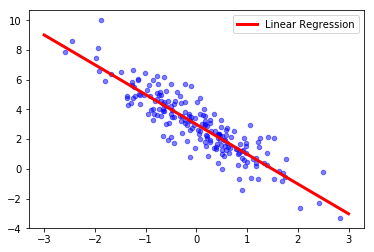

In [41]:
# one dimensional features, one dimensional target
num_samples = 200
# note that currently X needs to have shape (n, 1), not (n,) to use the regression methods.
# I plan to fix this so that X is automatically reshaped to (n,1) in the function.
X = np.random.normal(loc = 0, scale = 1.0, size = (num_samples,1))
m = -2
c = 3
y = m*X + c + np.random.normal(size =(num_samples,1))
plt.scatter(X, y, c = 'b', alpha = 0.5, s = 20)
W = regression.ridge_regression(X,y,C=0, add_bias=True)
print(W.shape)
t = np.linspace(-3,3,10)
line = plt.plot(t, W[0][0]*t + W[1][0], c='r', label = 'Linear Regression')
plt.setp(line, linewidth = 3)
plt.legend()
axes = plt.gca()
plt.show()

In [47]:
# Comparisons of ridge regression with different regularisations.
Cs = [0,0.1,1,5]
ms = {}
bs = {}
t = np.linspace(-100,100,30)
for c in Cs:
    W = regression.ridge_regression(X,y,C=c, add_bias = True)
    ms[c]=np.round(W[0][0], decimals = 4)
    bs[c]= np.round(W[1][0], decimals=4)
print("Estimates of m for various values of regularisation constant C")
print(ms)
print("Estimates of c for various values of regularisation constat C")
print(bs)

Estimates of m for various values of regularisation constant C
{0: -2.0059, 0.1: -2.0047, 5: -1.9479, 1: -1.994}
Estimates of c for various values of regularisation constat C
{0: 2.9936, 0.1: 2.9921, 5: 2.9194, 1: 2.9785}


##### Multi-dimensional features, one-dimensional target
In this case we use

$ y = m_1 x_1 + m_2 x_2 + m_3 x_3 + c + \epsilon, \quad m_i, x_i \in \mathbb{R}$

to test the model.

In [56]:
# multi-dimensional features, one-dimensional target
num_samples =200
m1 = 3
m2 = 1
m3 = 4
c = -5
X = np.random.normal(scale = 2.0, size = (num_samples, 3))
y = m1*X[:,0] + m2*X[:,1] + m3 * X[:,2] + c + np.random.normal(size = num_samples)
W = regression.ridge_regression(X,y)
print("Actual values of m:", [m1,m2,m3])
print("Estimates of m:", W[:-1])
print("Actual value of c:", c)
print("Estimate of c:", W[-1])

Actual values of m: [3, 1, 4]
Estimates of m: [3.02501965 1.01738523 4.03070057]
Actual value of c: -5
Estimate of c: -4.9302030398793


When many of the features are redundant, Lasso (L1 regularised) regression is good at eliminating non-useful features.

Note that my current implementation isn't actually setting redundant features to zero, possibly due to how I've used scipy.optimize.minimise.

In [69]:
num_samples = 200
m1 = 3
m2 = -5
c = 0
X = np.random.normal(scale = 10, size = (num_samples, 10))
y = m1*X[:,0] + m2*X[:,1] + c + np.random.normal(size = num_samples)
Wridge = regression.ridge_regression(X,y)
Wlasso = regression.lp_regression(X,y,C = 10.0, p=1.0, add_bias = True, max_iter = 10000)
print("Actual values of m:", [m1, m2])
print("Lasso regression estimates of m:")
print(Wlasso[:-1])

Actual values of m: [3, -5]
Lasso regression estimates of m:
[ 2.99253034e+00 -5.00912131e+00  4.76847396e-03 -1.30783487e-02
  3.25125348e-03  1.15760399e-02 -2.09914071e-03 -1.20832262e-02
  2.49576667e-03  1.04573563e-02]


##### K-nearest neighbours regression
This is a useful regression method that has no training time, the run time is completely contained in the time to predict. This could be useful if your dataset is very large, but split into smaller segments. For a new data point in some segment, you can get the k-nearest neighours prediction by just looking for the k-nearest neighbours in that segment.

Below we simply compute a segment of simulated data. In principle the idea is that these segments are already known, so that you don't have to spend the time computing it.

In [89]:
num_samples =10000
X = np.random.normal(scale = 5, size = (num_samples, 1))
x = np.array([3])
Xsegment = X[abs(X-3)<0.1]
print("The segment has {} data-points.".format(len(Xsegment)))
y = 2*X + 1
ysegment = 2*Xsegment + 1
print("The actual value of y(x) is {}".format(2*x+1))
print("The knn prediction of y(x) is {}".format(regression.knn_regression(x,10, Xsegment, ysegment)))

The segment has 130 data-points.
The actual value of y(x) is [7]
The knn prediction of y(x) is 6.997350703988199


#### Classification models
In this case we create features $X$ by taking samples of a normal distribution, and classify these according to some linear decision, i.e. $y = sign(x \cdot w)$ where $w$ corresponds to the normal of some hyperplane in feature space.

The simplest case is $w = (1,0)$ in 2 dimensions, i.e. $(x_1,x_2)$ is class 1 if $x_1 > 0$ and class -1 if $x_1<0$.

In [102]:
import classification

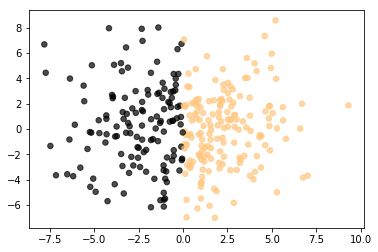

In [116]:
num_samples = 300
X = np.random.normal(loc = 0, scale = 3.0, size = (num_samples,2))
y = np.ones(num_samples)
y[X[:,0]<0] = -1
plt.scatter(X[:,0],X[:,1], c = y,cmap = plt.get_cmap("copper"), s = 30, alpha = 0.9)
plt.show()

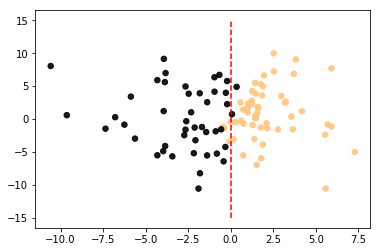

In [119]:
# K-nearest neighbours classification
x = np.random.normal(loc = 0, scale = 4.0, size = (100, 2))
predictions = np.zeros(100)
for i in range(100):
    predictions[i] = classification.knn_classifier(x[i,:],5,X, y)
plt.scatter(x[:,0], x[:,1], c = predictions, cmap = plt.get_cmap("copper"), s = 30, alpha = 0.9)
t = np.linspace(-15,15,20)
# plot decision boundary
plt.plot(np.zeros(20), t, c = 'r', linestyle = '--')
plt.show()

##### Remarks
As can be seen, this often misclassifies points close to the boundary.

This issue motivates classification algorithms that give some sort of probability/confidence bound on the prediction. 

One way to model this is that for a new point $x$, model the posterior probability of the class $y_x$ of $x$ as follows

$ P(y_x = 1 | X,y,x) = P(y_x =1) * N(x| \mu_1, \Sigma_1)$

where $\mu_1$ is the mean of all training data $X$ with class $y=1$, and $\Sigma_1$ is the covariance matrix associated to this data. If the data is uniformly spread over the classes, i.e. $P(y_x = y_0)$ is independent of the class $y_0$ then this amounts to assigning a probability to class $y_0$ for $x$ based on the normal distribution with mean equal to the emperical mean of the training data in class $y_0$, and covariance equal to the emperical covariance of the training data in class $y_0$. 

This method is called the plug_in_probability in classification.py.

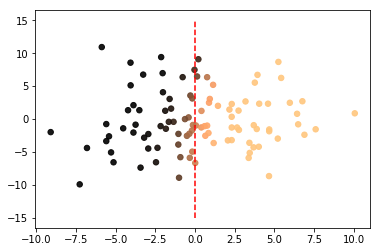

In [118]:
probabilities = np.zeros(100)
for i in range(100):
    probabilities[i] = classification.plug_in_probability(x[i,:], X, y)[1.0]
plt.scatter(x[:,0], x[:,1], c = probabilities, cmap = plt.get_cmap("copper"), s = 30, alpha = 0.9)
t = np.linspace(-15,15,20)
# plot decision boundary
plt.plot(np.zeros(20), t, c = 'r', linestyle = '--')
plt.show()

##### Remarks
The colour gradient in the above plot neatly demonstrates how the model is less sure at the decision boundary. The above method can be localised by first restricting $X$ to the points in some neighbourhood of the new point $x$. This could be useful in cases where the decision boundary is non-linear.

The above method doesn't give us an estimate for the actual decision boundary. This can be done by using a simple linear classifier 

$\hat{y}_w = sign(x \cdot w)$ 

and using gradient descent on the error 

$L = -\sum_{x \in M_{1}} x \cdot w + \sum_{x \in M_{-1}} x \cdot w $

where 

$M_i = \{ (x,y) \in T \, | \, sign(x \cdot w) \neq y \}$,

and $T$ is the pairs of training data and a binary class $y = \pm 1$.

In other words, $L$ adds up all the misclassified points, weighted by how badly the linear model misclassifies them.

The gradient of $L$ is easy to compute.

$D_w L = -\sum_{x \in M_1} x + \sum_{x \in M_{-1}} x$

Using this to update $w$ is performed by the misclassification_gradient_descent function in the classification library.

Since $w$ will be the normal to the decision boundary, in 2 dimensions this means $x_2 = -b-\frac{w_1}{w_2} x_1$ is the line defining the decision boundary, where $b$ is the bias.

There are 0.0 misclassifications of training data.
The estimated decision boundary is
-0.3944516285307738x2 + 727.5374576292945x1 + 12.0=0


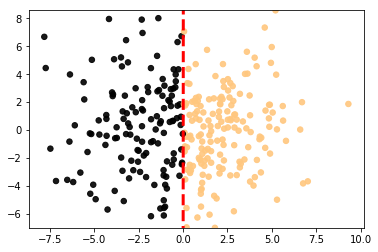

In [144]:
W,b = classification.misclassification_gradient_descent(X,y)
pred = classification.linear_classifier(X,W,b)
print("There are {} misclassifications of training data.".format(np.sum(pred-y)/2))
print("The estimated decision boundary is")
print("{}x2 + {}x1 + {}=0".format(W[1][0], W[0][0], b))
t = np.linspace(-0.1,0.1,100)
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.get_cmap("copper"), s = 30, alpha = 0.9)
line = plt.plot(t, -b - (W[0][0]/W[1][0] * t ), c = 'r', linestyle = '--')
plt.setp(line, linewidth=3)
ax = plt.gca()
ax.set_ylim([min(X[:,1]), max(X[:,1])])
plt.show()

Note that this is actually quite an awkward boundary to predict, as one coefficient/weight should be zero, whilst the other can be arbitrarily large. 

In any case, one issue this method has is that it can converge on any suitable linear decision boundary. If the data are linearly separable (with non-zero margin) there are infinitely many choices of separating planes, but some might be more natural.

#### Spam detection - Naive Bayes for text classification
Given a collection of emails with labels indicating whether they are spam, the Naive Bayes method for classifying a new message is to assume each word is drawn from a random variable, independent of all other words in the email. This isn't necessarily true but it is a useful assumption to build a simple model. 

Let $T = \{ (x_i, y_i) \, : \, i = 1, \ldots, n \}$ be the set of emails, where $x_i = \{w_{ij}\}_{j=1} ^{m_i}$ is the email written as a sequence of length $m_i$ of words $w_{ij}$, and $y_i=1$ if the email is spam, $0$ otherwise. 

Then we can compute the emperical estimate of the prior probability of a message being spam as $P(y=1) = \sum_i y_i / n$. Further we can compute estimates of the conditionals

$$ P(w=w_{ij} | y_i =1) = \frac{\sum_{w \in W_S} \chi(w=w_{ij})}{\sum_i y_i} $$

where $W_S$ is the set of all words in spam messages, and $\chi(w = w_{ij})$ is $1$ if $w=w_{ij}$ and $0$ otherwise (the characteristic function). Similarly we can compute $P(w=w_{ij} | y_i =0)$. 

Then given a new message $x = \{v_j \}_{j=1} ^{m}$ we can compute the probability that $x$ is a spam message as 

$$ P(y =1 |x) = \frac{\Pi_{j} P(v_j | y=1)P(y=1)}{\Pi_j P(v_j | y=1)P(y=1) + \Pi_j P(v_j | y=0)P(y=0)} $$

These computations are carried out by the functions word_conditionals and naive_bayes_text_classification in the classification.py library. These functions also do some minimal text processing by removing punctuation and uniformising the words to lower case. 

The below contrived example of spam and not spam emails are from the Udacity intro to AI course, though the methods should work on a reasonably large data set.

In [4]:
emails = ["offer is secret", "click secret link", "secret sports link", 
         "play sports today", "went play sports", "secret sports event", 
         "sports is today", "sports costs money"]

spam = [1,1,1,0,0,0,0,0] # can also use booleans

spam_conditionals, not_spam_conditionals = classification.word_conditionals(emails, spam)
print(spam_conditionals)

{'money': 0, 'secret': 0.3333333333333333, 'went': 0, 'today': 0, 'costs': 0, 'play': 0, 'sports': 0.1111111111111111, 'event': 0, 'link': 0.2222222222222222, 'click': 0.1111111111111111, 'is': 0.1111111111111111, 'offer': 0.1111111111111111}


It is easy to verify that these are simply the fractions given by the number of times a word appears in spam messages divided by the number of words (counting non-uniqueness) in spam messages.

Below I predict the probability of a new message being spam based on this training data. The examples are again from the Udacity intro to AI course, though modified with arbitrary capitalisation and punctuation to demonstrate the processing methods. 

In [5]:
new_messages = ["spOr#ts", " secrEt IS s;ecret", "today .is sec/ret"]
for message in new_messages:
    print("Probability of \"{}\" being spam: {}".format(message, classification.naive_bayes_text_classification(message, emails, spam)))

Probability of "spOr#ts" being spam: 0.16666666666666669
Probability of " secrEt IS s;ecret" being spam: 0.9615384615384616
Probability of "today .is sec/ret" being spam: 0.0


The final example demonstrates a flaw due to this method not having any regularisation. Since the word "today" never shows up in the training examples of spam messages, it immediately makes the conditional probability zero  $P(today|spam)=0$. One method to fix this is Laplace smoothing.